In [324]:
from optimizer_supervised import Optimizer
from model import TransformerModel
from Hamiltonian import Ising

In [325]:
import numpy as np
import torch

In [326]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    # Set the device to GPU
    device = torch.device("cuda")
    print("GPU is available")
else:
    # Set the device to CPU
    device = torch.device("cpu")
    print("GPU is not available, using CPU")

# Example usage: Move a tensor to the selected device
x = torch.tensor([1, 2, 3])
x = x.to(device)

GPU is available


In [327]:
torch.set_default_tensor_type(
    torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
)

In [328]:
system_sizes = np.arange(8, 21, 2).reshape(-1, 1)
Hamiltonians = [Ising(size, periodic=True) for size in system_sizes]
param_dim = Hamiltonians[0].param_dim
embedding_size = 32
n_head = 8
n_hid = embedding_size
n_layers = 8
dropout = 0
minibatch = 10000

print("Sizes:", system_sizes)
print("Hamiltonians:", Hamiltonians)
print("Param dim:", param_dim)

Sizes: [[ 8]
 [10]
 [12]
 [14]
 [16]
 [18]
 [20]]
Hamiltonians: [<Hamiltonian.Ising object at 0x7820c5899010>, <Hamiltonian.Ising object at 0x7820e2e2ede0>, <Hamiltonian.Ising object at 0x7820d014d7c0>, <Hamiltonian.Ising object at 0x7820c7712de0>, <Hamiltonian.Ising object at 0x7820c58980b0>, <Hamiltonian.Ising object at 0x782145aff0b0>, <Hamiltonian.Ising object at 0x7820c5899370>]
Param dim: 1


/home/spandan/Projects/tqs/Hamiltonian_utils.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  system_size = torch.tensor(system_size, dtype=torch.int64).reshape(-1)


In [329]:
model = TransformerModel(
    system_sizes,
    param_dim,
    embedding_size,
    n_head,
    n_hid,
    n_layers,
    dropout=dropout,
    minibatch=minibatch,
)

/home/spandan/anaconda3/envs/tqs2/lib/python3.12/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer was not TransformerEncoderLayer
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [330]:
param_range = None
point_of_interest = None
use_SR = False

In [331]:
import os

results_dir = "results"
paper_checkpoint_name = "ckpt_100000_Ising_32_8_8_0.ckpt"
paper_checkpoint_path = os.path.join(results_dir, paper_checkpoint_name)
checkpoint = torch.load(paper_checkpoint_path)
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [332]:
system_size = torch.tensor([8])
param = torch.tensor([1])
model.set_param(system_size=system_size, param=param)

print(model.param)
print(model.system_size)

tensor([1])
tensor([8])


In [333]:
from model_utils import compute_psi

In [334]:
H = Hamiltonians[0]
basis = H.generate_basis()
symmetry = H.symmetry
log_amp, log_phase = compute_psi(model, basis, symmetry, check_duplicate=True)
print("Log_amp:", log_amp)
print("Log_phase:", log_phase)

Log_amp: tensor([-2.1222, -3.5086, -4.4368, -3.9895, -4.5772, -5.6305, -5.1773, -4.2087,
        -4.6137, -5.8911, -6.6279, -5.9605, -5.4329, -6.2153, -5.4597, -4.2751,
        -4.6137, -5.9447, -6.8206, -6.2813, -6.7947, -7.7118, -7.1451, -6.0487,
        -5.4906, -6.6435, -7.2341, -6.3781, -5.7410, -6.3568, -5.4997, -4.2087,
        -4.5772, -5.9247, -6.8350, -6.3357, -6.9281, -7.9133, -7.4203, -6.3781,
        -6.7947, -7.9943, -8.6644, -7.8910, -7.3602, -8.0294, -7.2216, -5.9605,
        -5.4329, -6.6956, -7.5206, -6.8604, -7.3602, -8.1426, -7.4854, -6.2813,
        -5.7410, -6.7946, -7.3120, -6.3357, -5.7201, -6.2343, -5.3374, -3.9895,
        -4.4368, -5.7956, -6.7149, -6.2343, -6.8350, -7.8454, -7.3678, -6.3568,
        -6.8206, -8.0551, -8.7591, -8.0294, -7.5206, -8.2357, -7.4508, -6.2153,
        -6.6279, -7.9147, -8.7591, -8.1426, -8.6644, -9.4966, -8.8783, -7.7118,
        -7.2341, -8.3186, -8.8579, -7.9133, -7.3120, -7.8454, -6.9681, -5.6305,
        -5.1773, -6.4928, -7.36

In [335]:
print(torch.tensor(H.generate_basis())[4])

tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])


/tmp/ipykernel_25272/715684954.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.tensor(H.generate_basis())[4])


It's quite nice that the phases are a periodic sequence:


In [336]:
amp = torch.sqrt(torch.exp(log_amp))
phase = torch.exp(log_phase)

print("Amplitude:", amp)
print("Phase:", phase)

Amplitude: tensor([0.3461, 0.1730, 0.1088, 0.1361, 0.1014, 0.0599, 0.0751, 0.1219, 0.0996,
        0.0526, 0.0364, 0.0508, 0.0661, 0.0447, 0.0652, 0.1179, 0.0996, 0.0512,
        0.0330, 0.0433, 0.0335, 0.0212, 0.0281, 0.0486, 0.0642, 0.0361, 0.0269,
        0.0412, 0.0567, 0.0417, 0.0639, 0.1219, 0.1014, 0.0517, 0.0328, 0.0421,
        0.0313, 0.0191, 0.0245, 0.0412, 0.0335, 0.0184, 0.0131, 0.0193, 0.0252,
        0.0180, 0.0270, 0.0508, 0.0661, 0.0352, 0.0233, 0.0324, 0.0252, 0.0171,
        0.0237, 0.0433, 0.0567, 0.0335, 0.0258, 0.0421, 0.0573, 0.0443, 0.0693,
        0.1361, 0.1088, 0.0551, 0.0348, 0.0443, 0.0328, 0.0198, 0.0251, 0.0417,
        0.0330, 0.0178, 0.0125, 0.0180, 0.0233, 0.0163, 0.0241, 0.0447, 0.0364,
        0.0191, 0.0125, 0.0171, 0.0131, 0.0087, 0.0118, 0.0212, 0.0269, 0.0156,
        0.0119, 0.0191, 0.0258, 0.0198, 0.0307, 0.0599, 0.0751, 0.0389, 0.0251,
        0.0335, 0.0245, 0.0156, 0.0205, 0.0361, 0.0281, 0.0159, 0.0118, 0.0184,
        0.0237, 0.0178, 0.027

In [337]:
psi_predicted = amp.mul(torch.exp(1j * phase))
print(psi_predicted)

tensor([ 0.2316+0.2571j, -0.1605-0.0648j, -0.0793-0.0745j,  0.0908+0.1013j,
        -0.0771-0.0658j,  0.0399+0.0447j,  0.0501+0.0560j, -0.0604-0.1059j,
        -0.0766-0.0636j,  0.0350+0.0392j,  0.0242+0.0271j, -0.0113-0.0495j,
         0.0441+0.0493j,  0.0270-0.0356j,  0.0174-0.0629j,  0.0786+0.0879j,
        -0.0766-0.0636j,  0.0341+0.0382j,  0.0220+0.0246j, -0.0260-0.0346j,
         0.0223+0.0249j,  0.0145-0.0154j, -0.0123-0.0253j,  0.0324+0.0362j,
         0.0428+0.0479j, -0.0141-0.0332j,  0.0033-0.0267j,  0.0275+0.0307j,
        -0.0473-0.0311j,  0.0277+0.0311j,  0.0426+0.0477j, -0.0604-0.1059j,
        -0.0771-0.0658j,  0.0344+0.0386j,  0.0218+0.0245j, -0.0061-0.0416j,
         0.0209+0.0233j,  0.0155-0.0113j, -0.0186-0.0159j,  0.0275+0.0307j,
         0.0223+0.0249j,  0.0065-0.0172j, -0.0008-0.0131j,  0.0129+0.0144j,
        -0.0155-0.0199j,  0.0120+0.0135j,  0.0180+0.0202j, -0.0113-0.0495j,
         0.0441+0.0493j,  0.0152-0.0317j, -0.0133-0.0191j,  0.0216+0.0241j,
        -0.0

In [338]:
energy, psi_true = H.calc_ground(param=1)
psi_true = torch.tensor(psi_true)
print(psi_true)

tensor([ 0.4591, -0.1292, -0.1292,  0.0774, -0.1292,  0.0404,  0.0774, -0.0607,
        -0.1292,  0.0378,  0.0404, -0.0274,  0.0774, -0.0274, -0.0607,  0.0564,
        -0.1292,  0.0375,  0.0378, -0.0246,  0.0404, -0.0137, -0.0274,  0.0247,
         0.0774, -0.0246, -0.0274,  0.0221, -0.0607,  0.0247,  0.0564, -0.0607,
        -0.1292,  0.0378,  0.0375, -0.0246,  0.0378, -0.0128, -0.0246,  0.0221,
         0.0404, -0.0128, -0.0137,  0.0110, -0.0274,  0.0113,  0.0247, -0.0274,
         0.0774, -0.0246, -0.0246,  0.0192, -0.0274,  0.0110,  0.0221, -0.0246,
        -0.0607,  0.0221,  0.0247, -0.0246,  0.0564, -0.0274, -0.0607,  0.0774,
        -0.1292,  0.0404,  0.0378, -0.0274,  0.0375, -0.0137, -0.0246,  0.0247,
         0.0378, -0.0128, -0.0128,  0.0113, -0.0246,  0.0110,  0.0221, -0.0274,
         0.0404, -0.0137, -0.0128,  0.0110, -0.0137,  0.0060,  0.0110, -0.0137,
        -0.0274,  0.0110,  0.0113, -0.0128,  0.0247, -0.0137, -0.0274,  0.0404,
         0.0774, -0.0274, -0.0246,  0.02

/tmp/ipykernel_25272/4156994520.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  psi_true = torch.tensor(psi_true)


Is it just a phase difference?


In [339]:
modulus = torch.abs(psi_predicted)
print(modulus)

tensor([0.3461, 0.1730, 0.1088, 0.1361, 0.1014, 0.0599, 0.0751, 0.1219, 0.0996,
        0.0526, 0.0364, 0.0508, 0.0661, 0.0447, 0.0652, 0.1179, 0.0996, 0.0512,
        0.0330, 0.0433, 0.0335, 0.0212, 0.0281, 0.0486, 0.0642, 0.0361, 0.0269,
        0.0412, 0.0567, 0.0417, 0.0639, 0.1219, 0.1014, 0.0517, 0.0328, 0.0421,
        0.0313, 0.0191, 0.0245, 0.0412, 0.0335, 0.0184, 0.0131, 0.0193, 0.0252,
        0.0180, 0.0270, 0.0508, 0.0661, 0.0352, 0.0233, 0.0324, 0.0252, 0.0171,
        0.0237, 0.0433, 0.0567, 0.0335, 0.0258, 0.0421, 0.0573, 0.0443, 0.0693,
        0.1361, 0.1088, 0.0551, 0.0348, 0.0443, 0.0328, 0.0198, 0.0251, 0.0417,
        0.0330, 0.0178, 0.0125, 0.0180, 0.0233, 0.0163, 0.0241, 0.0447, 0.0364,
        0.0191, 0.0125, 0.0171, 0.0131, 0.0087, 0.0118, 0.0212, 0.0269, 0.0156,
        0.0119, 0.0191, 0.0258, 0.0198, 0.0307, 0.0599, 0.0751, 0.0389, 0.0251,
        0.0335, 0.0245, 0.0156, 0.0205, 0.0361, 0.0281, 0.0159, 0.0118, 0.0184,
        0.0237, 0.0178, 0.0272, 0.0526, 

In [340]:
import pandas as pd
import matplotlib.pyplot as plt

array([[<Axes: title={'center': '0'}>]], dtype=object)

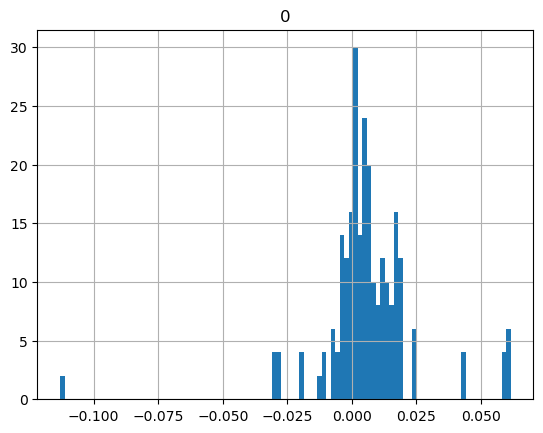

In [341]:
diffs = modulus - torch.abs(psi_true)
diffs = diffs.cpu().detach().numpy()
diffs_df = pd.DataFrame(diffs)
diffs_df.hist(bins=100)

Despite a few outliers, it seems that the amplitude difference between the predictions and true values is small


In [342]:
diffs_df.describe()

,0
count,256.000000
mean,0.006045
std,0.018868
min,-0.113014
25%,-0.000361
50%,0.004990
75%,0.013344
max,0.061587


Is the phase difference global?


In [343]:
phase_true = torch.angle(psi_true)
phase_predicted = torch.angle(psi_predicted)

phase_difference = phase_true - phase_predicted
print(phase_difference)

tensor([-0.8375,  5.8996,  5.5290, -0.8401,  5.5768, -0.8427, -0.8413,  5.2310,
         5.5903, -0.8418, -0.8419,  4.9365, -0.8412,  4.0634,  4.4417, -0.8415,
         5.5903, -0.8429, -0.8415,  5.3573, -0.8406,  3.9572,  5.1651, -0.8409,
        -0.8409,  5.1142,  4.5907, -0.8411,  5.7012, -0.8429, -0.8424,  5.2310,
         5.5768, -0.8433, -0.8425,  4.8579, -0.8403,  3.7705,  5.5764, -0.8411,
        -0.8406,  4.3526,  4.7721, -0.8425,  5.3757, -0.8432, -0.8427,  4.9365,
        -0.8412,  4.2650,  5.3205, -0.8396,  5.3757, -0.8426, -0.8416,  5.3573,
         5.7012, -0.8409, -0.8431,  4.8579, -0.8402,  4.0959,  4.2485, -0.8401,
         5.5290, -0.8441, -0.8434,  4.0959, -0.8425,  2.7662,  4.4275, -0.8429,
        -0.8415,  3.9012,  3.9361, -0.8432,  5.3205, -0.8427, -0.8435,  4.0634,
        -0.8419,  3.3410,  3.9361, -0.8426,  4.7721, -0.8436, -0.8431,  3.9572,
         4.5907, -0.8431, -0.8446,  3.7705, -0.8431,  2.7662,  2.8852, -0.8427,
        -0.8413,  3.5501,  4.4275, -0.84

Phase differences are not global.


In [344]:
print(phase_true)
print(phase_predicted)

tensor([0.0000, 3.1416, 3.1416, 0.0000, 3.1416, 0.0000, 0.0000, 3.1416, 3.1416,
        0.0000, 0.0000, 3.1416, 0.0000, 3.1416, 3.1416, 0.0000, 3.1416, 0.0000,
        0.0000, 3.1416, 0.0000, 3.1416, 3.1416, 0.0000, 0.0000, 3.1416, 3.1416,
        0.0000, 3.1416, 0.0000, 0.0000, 3.1416, 3.1416, 0.0000, 0.0000, 3.1416,
        0.0000, 3.1416, 3.1416, 0.0000, 0.0000, 3.1416, 3.1416, 0.0000, 3.1416,
        0.0000, 0.0000, 3.1416, 0.0000, 3.1416, 3.1416, 0.0000, 3.1416, 0.0000,
        0.0000, 3.1416, 3.1416, 0.0000, 0.0000, 3.1416, 0.0000, 3.1416, 3.1416,
        0.0000, 3.1416, 0.0000, 0.0000, 3.1416, 0.0000, 3.1416, 3.1416, 0.0000,
        0.0000, 3.1416, 3.1416, 0.0000, 3.1416, 0.0000, 0.0000, 3.1416, 0.0000,
        3.1416, 3.1416, 0.0000, 3.1416, 0.0000, 0.0000, 3.1416, 3.1416, 0.0000,
        0.0000, 3.1416, 0.0000, 3.1416, 3.1416, 0.0000, 0.0000, 3.1416, 3.1416,
        0.0000, 3.1416, 0.0000, 0.0000, 3.1416, 3.1416, 0.0000, 0.0000, 3.1416,
        0.0000, 3.1416, 3.1416, 0.0000, 

In [345]:
wrong_phase = torch.exp(log_phase)
print(wrong_phase)

tensor([  0.8375, 449.6313, 450.0020,   0.8401, 449.9541,   0.8427,   0.8413,
        450.2999, 449.9406,   0.8418,   0.8419, 450.5944,   0.8412, 451.4676,
        451.0893,   0.8415, 449.9406,   0.8429,   0.8415, 450.1737,   0.8406,
        451.5737, 450.3658,   0.8409,   0.8409, 450.4167, 450.9402,   0.8411,
        449.8297,   0.8429,   0.8424, 450.2999, 449.9541,   0.8433,   0.8425,
        450.6730,   0.8403, 451.7604, 449.9546,   0.8411,   0.8406, 451.1783,
        450.7588,   0.8425, 450.1552,   0.8432,   0.8427, 450.5944,   0.8412,
        451.2659, 450.2104,   0.8396, 450.1552,   0.8426,   0.8416, 450.1737,
        449.8297,   0.8409,   0.8431, 450.6730,   0.8402, 451.4351, 451.2824,
          0.8401, 450.0020,   0.8441,   0.8434, 451.4351,   0.8425, 452.7647,
        451.1035,   0.8429,   0.8415, 451.6297, 451.5948,   0.8432, 450.2104,
          0.8427,   0.8435, 451.4676,   0.8419, 452.1900, 451.5948,   0.8426,
        450.7588,   0.8436,   0.8431, 451.5737, 450.9402,   0.84

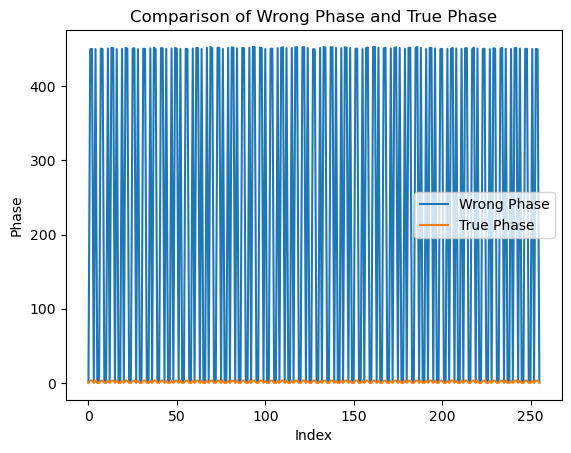

In [346]:
import matplotlib.pyplot as plt

plot_wrong = wrong_phase.cpu().detach().numpy()
plot_true = phase_true.cpu().detach().numpy()

x = range(len(wrong_phase))
plt.plot(x, plot_wrong, label="Wrong Phase")
plt.plot(x, plot_true, label="True Phase")

plt.xlabel("Index")
plt.ylabel("Phase")
plt.title("Comparison of Wrong Phase and True Phase")
plt.legend()
plt.show()

In [347]:
torch.div(phase_true, wrong_phase)

tensor([0.0000, 0.0070, 0.0070, 0.0000, 0.0070, 0.0000, 0.0000, 0.0070, 0.0070,
        0.0000, 0.0000, 0.0070, 0.0000, 0.0070, 0.0070, 0.0000, 0.0070, 0.0000,
        0.0000, 0.0070, 0.0000, 0.0070, 0.0070, 0.0000, 0.0000, 0.0070, 0.0070,
        0.0000, 0.0070, 0.0000, 0.0000, 0.0070, 0.0070, 0.0000, 0.0000, 0.0070,
        0.0000, 0.0070, 0.0070, 0.0000, 0.0000, 0.0070, 0.0070, 0.0000, 0.0070,
        0.0000, 0.0000, 0.0070, 0.0000, 0.0070, 0.0070, 0.0000, 0.0070, 0.0000,
        0.0000, 0.0070, 0.0070, 0.0000, 0.0000, 0.0070, 0.0000, 0.0070, 0.0070,
        0.0000, 0.0070, 0.0000, 0.0000, 0.0070, 0.0000, 0.0069, 0.0070, 0.0000,
        0.0000, 0.0070, 0.0070, 0.0000, 0.0070, 0.0000, 0.0000, 0.0070, 0.0000,
        0.0069, 0.0070, 0.0000, 0.0070, 0.0000, 0.0000, 0.0070, 0.0070, 0.0000,
        0.0000, 0.0070, 0.0000, 0.0069, 0.0069, 0.0000, 0.0000, 0.0070, 0.0070,
        0.0000, 0.0070, 0.0000, 0.0000, 0.0070, 0.0070, 0.0000, 0.0000, 0.0070,
        0.0000, 0.0070, 0.0069, 0.0000, 

In [348]:
1 / 0.2886

3.465003465003465

In [349]:
phase_factor_diff = phase_predicted / phase_true
print(phase_factor_diff)

tensor([    inf, -0.8779, -0.7599,     inf, -0.7752,     inf,     inf, -0.6651,
        -0.7795,     inf,     inf, -0.5714,     inf, -0.2934, -0.4138,     inf,
        -0.7795,     inf,     inf, -0.7053,     inf, -0.2596, -0.6441,     inf,
            inf, -0.6279, -0.4613,     inf, -0.8148,     inf,     inf, -0.6651,
        -0.7752,     inf,     inf, -0.5463,     inf, -0.2002, -0.7750,     inf,
            inf, -0.3855, -0.5190,     inf, -0.7111,     inf,     inf, -0.5714,
            inf, -0.3576, -0.6936,     inf, -0.7111,     inf,     inf, -0.7053,
        -0.8148,     inf,     inf, -0.5463,     inf, -0.3038, -0.3523,     inf,
        -0.7599,     inf,     inf, -0.3038,     inf,  0.1195, -0.4093,     inf,
            inf, -0.2418, -0.2529,     inf, -0.6936,     inf,     inf, -0.2934,
            inf, -0.0635, -0.2529,     inf, -0.5190,     inf,     inf, -0.2596,
        -0.4613,     inf,     inf, -0.2002,     inf,  0.1195,  0.0816,     inf,
            inf, -0.1300, -0.4093,     i

In [350]:
mse = torch.mean((psi_predicted - psi_true) ** 2)
print("MSE:", mse)

MSE: tensor(-0.0008-0.0021j, dtype=torch.complex128, grad_fn=<MeanBackward0>)


In [351]:
real_imag = torch.view_as_real(psi_predicted)
psi_true_real_imag = torch.view_as_real(psi_true.to(torch.complex64))
print(real_imag)
print(psi_true_real_imag)

tensor([[ 0.2316,  0.2571],
        [-0.1605, -0.0648],
        [-0.0793, -0.0745],
        [ 0.0908,  0.1013],
        [-0.0771, -0.0658],
        [ 0.0399,  0.0447],
        [ 0.0501,  0.0560],
        [-0.0604, -0.1059],
        [-0.0766, -0.0636],
        [ 0.0350,  0.0392],
        [ 0.0242,  0.0271],
        [-0.0113, -0.0495],
        [ 0.0441,  0.0493],
        [ 0.0270, -0.0356],
        [ 0.0174, -0.0629],
        [ 0.0786,  0.0879],
        [-0.0766, -0.0636],
        [ 0.0341,  0.0382],
        [ 0.0220,  0.0246],
        [-0.0260, -0.0346],
        [ 0.0223,  0.0249],
        [ 0.0145, -0.0154],
        [-0.0123, -0.0253],
        [ 0.0324,  0.0362],
        [ 0.0428,  0.0479],
        [-0.0141, -0.0332],
        [ 0.0033, -0.0267],
        [ 0.0275,  0.0307],
        [-0.0473, -0.0311],
        [ 0.0277,  0.0311],
        [ 0.0426,  0.0477],
        [-0.0604, -0.1059],
        [-0.0771, -0.0658],
        [ 0.0344,  0.0386],
        [ 0.0218,  0.0245],
        [-0.0061, -0

In [352]:
ham = H.full_H(param=1)

In [353]:
mse = torch.mean((real_imag - psi_true_real_imag) ** 2)
print("MSE:", mse)

MSE: tensor(0.0016, grad_fn=<MeanBackward0>)


In [354]:
adam = torch.optim.Adam(model.parameters(), lr=0.01)
adam.zero_grad()
mse.backward(retain_graph=True)

Being able to produce a computational graph provides evidence that .backward and .step actually do full backpropagation with weight updates:


In [355]:
from torchviz import make_dot

In [356]:
# By user ucalyptus, from https://github.com/szagoruyko/pytorchviz/issues/41
def resize_graph(dot, size_per_element=0.15, min_size=12):
    """Resize the graph according to how much content it contains.
    Modify the graph in place.
    """
    # Get the approximate number of nodes and edges
    num_rows = len(dot.body)
    content_size = num_rows * size_per_element
    size = max(min_size, content_size)
    size_str = str(size) + "," + str(size)
    dot.graph_attr.update(size=size_str)

In [357]:
model.named_parameters()

<generator object Module.named_parameters at 0x7820c535f340>

In [358]:
torch.autograd.set_detect_anomaly(True)

In [359]:
# graph = make_dot(
#     mse, params=dict(model.named_parameters()), show_attrs=True, show_saved=True
# )
# resize_graph(graph, 0.7)
# graph.render("mse_full", format="png")

In [360]:
adam.step()

## Implementation in optimizer_supervised.py


In [361]:
optim = Optimizer(model, Hamiltonians, point_of_interest=point_of_interest)

In [362]:
loss = optim.calculate_mse_step(H, basis_batch=None, use_symmetry=True)
print("MSE:", loss)

MSE: tensor(0.0043, grad_fn=<MseLossBackward0>)


In [363]:
loss.backward(retain_graph=True)

## Generator for Points in Parameter Space

In [364]:
import itertools

In [365]:
def generate_parameter_range(start, end, step):
    """
    A simple generator returning the next value in a range of values
    whenever called, according to a step size.
    """
    value = start
    while value < end:
        yield value
        value += step


def generate_parameter_points(parameter_ranges, step_sizes, distribution=None):
    """
    Generate all possible combinations of parameter values for a model
    (i.e., the Cartesian product of values of parameters in a slice of parameter space)

    Parameters:
        parameter_ranges: torch.Tensor of shape (n_parameters, 2)
            The starting and ending values for each dimension of the slice of parameter space
        step_sizes: torch.Tensor of shape (n_parameters,)
            The step size for each dimension of the slice of parameter space
        distribution: N/A
            TODO: Not implemented

    """

    if distribution is not None:
        raise NotImplementedError(
            "Sampling using a custom distribution is not implemented yet."
        )

    # Every possible individual parameter value for each parameter, in order
    parameter_ranges = [
        generate_parameter_range(start.item(), end.item(), step.item())
        for (start, end), step in zip(parameter_ranges, step_sizes)
    ]

    return itertools.product(*parameter_ranges)

In [366]:
test_parameter_ranges = torch.tensor([[0, 2 * np.pi], [0, 10], [0.5, 1.5]])
test_step_sizes = torch.tensor([0.1, 1, 0.1])

print("test_parameter_ranges:\n", test_parameter_ranges)
print("test_step_sizes:\n", test_step_sizes)

test_parameter_ranges:
 tensor([[ 0.0000,  6.2832],
        [ 0.0000, 10.0000],
        [ 0.5000,  1.5000]])
test_step_sizes:
 tensor([0.1000, 1.0000, 0.1000])


In [378]:
for point in generate_parameter_points(test_parameter_ranges, test_step_sizes):
    print(torch.tensor(point))

tensor([0.0000, 0.0000, 0.5000])
tensor([0.0000, 0.0000, 0.6000])
tensor([0.0000, 0.0000, 0.7000])
tensor([0.0000, 0.0000, 0.8000])
tensor([0.0000, 0.0000, 0.9000])
tensor([0., 0., 1.])
tensor([0.0000, 0.0000, 1.1000])
tensor([0.0000, 0.0000, 1.2000])
tensor([0.0000, 0.0000, 1.3000])
tensor([0.0000, 0.0000, 1.4000])
tensor([0.0000, 1.0000, 0.5000])
tensor([0.0000, 1.0000, 0.6000])
tensor([0.0000, 1.0000, 0.7000])
tensor([0.0000, 1.0000, 0.8000])
tensor([0.0000, 1.0000, 0.9000])
tensor([0., 1., 1.])
tensor([0.0000, 1.0000, 1.1000])
tensor([0.0000, 1.0000, 1.2000])
tensor([0.0000, 1.0000, 1.3000])
tensor([0.0000, 1.0000, 1.4000])
tensor([0.0000, 2.0000, 0.5000])
tensor([0.0000, 2.0000, 0.6000])
tensor([0.0000, 2.0000, 0.7000])
tensor([0.0000, 2.0000, 0.8000])
tensor([0.0000, 2.0000, 0.9000])
tensor([0., 2., 1.])
tensor([0.0000, 2.0000, 1.1000])
tensor([0.0000, 2.0000, 1.2000])
tensor([0.0000, 2.0000, 1.3000])
tensor([0.0000, 2.0000, 1.4000])
tensor([0.0000, 3.0000, 0.5000])
tensor([0.000

In [374]:
torch.tensor(point).shape

torch.Size([3])

In [376]:
torch.tensor([[1], [2], [3]]).shape

torch.Size([3, 1])

In [377]:
print(H.system_size)

tensor([8])
